# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Making 3D Blobs

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [4]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

# Scaling the Data

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(data[0])

In [12]:
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

# Plotting the 3D Data

In [13]:
from mpl_toolkits.mplot3d import Axes3D

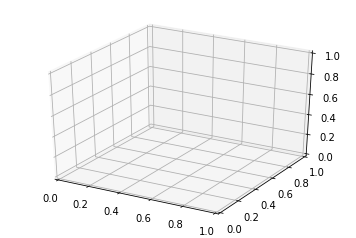

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

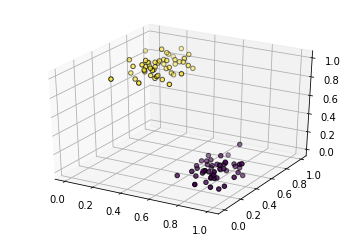

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, edgecolor='black', c=data[1])

# Importing Tensorflow

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

C:\Users\Eshban\Anaconda3\envs\100daysofmlcode\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Hyper-parameters

In [17]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

learning_rate = 0.01

# Placeholder

In [18]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

# Fully Connected Hidden Layer

In [20]:
hidden = fully_connected(X, num_hidden, activation_fn=None)

In [21]:
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

# Loss Function
### MSE

In [22]:
loss = tf.reduce_mean(tf.square(outputs - X))

# Optimizer
### Adam Optimizer

In [23]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# Initializing Global Variables

In [24]:
init = tf.global_variables_initializer()

# Training our model for 1000 steps

In [25]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X: scaled_data})
        
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [27]:
output_2d.shape

(100, 2)

# Plotting the dimensionality reduced data

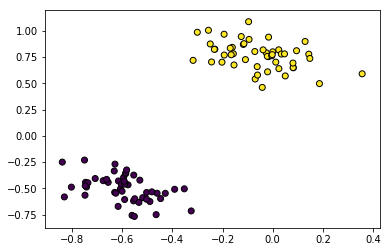

In [32]:
plt.scatter(output_2d[:,0], output_2d[:,1], edgecolor='black', c=data[1])